<a href="https://colab.research.google.com/github/vladimiralencar/DeepLearning-LANA/blob/master/DNN/DNN_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Otimização

<ul>
  <li>ADADELTA</li>
  <li>ADAGRAD</li>
  <li>ADAM</li>
  <li>NESTEROVS</li>
  <li>RMSPROP</li>
  <li>SGD</li>
  <li>CONJUGATE GRADIENT</li>
  <li>HESSIAN FREE</li>
  <li>LBFGS</li>
  <li>LINE GRADIENT DESCENT</li>
</ul>

## Backpropagation

Backpropagation é o principal meio pelo qual os pesos de uma rede neural são determinados durante o treinamento. Os programadores frequentemente treinam redes neurais profundas com backpropagation, porque ele escala muito bem quando executado em unidades gráficas de processamento (GPUs). Para entender esse algoritmo para redes neurais, devemos examinar como treiná-lo, bem como como ele processa um padrão.

A pós-propagação clássica foi ampliada e modificada para dar origem a vários algoritmos de treinamento diferentes. Vamos discutir os algoritmos de treinamento mais utilizados para as redes neurais. Começamos com backpropagation clássico.

Backpropagation é um tipo de descida de gradiente, e muitos livros usam esses dois termos de forma intercambiável. A descida gradual refere-se ao cálculo de um gradiente em cada peso na rede neural para cada elemento de treinamento. Como a rede neural não emitirá o valor esperado para um elemento de treinamento, o gradiente de cada peso lhe dará uma indicação sobre como modificar cada peso para alcançar o resultado esperado. Se a rede neural produzisse exatamente o que era esperado, o gradiente para cada peso seria 0, indicando que nenhuma alteração no peso é necessária.

O gradiente é a derivada da função de erro no valor atual do peso. A função de erro mede a distância da saída da rede neural da saída esperada. Na verdade, podemos usar gradient descent, um processo em que o valor do gradiente de cada peso pode alcançar valores ainda mais baixos da função de erro.

![Backpropagation](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/DNN/images/backpropagation.png?raw=true "Backpropagation")

Com respeito à função de erro, o gradiente é essencialmente a derivada parcial de cada peso na rede neural. Cada peso tem um gradiente que é a inclinação da função de erro. Um peso é uma conexão entre dois neurônios. O cálculo do gradiente da função de erro permite que o método de treinamento determine se deve aumentar ou diminuir o peso. Por sua vez, esta determinação irá diminuir o erro da rede neural. O erro é a diferença entre o resultado esperado e a saída real da rede neural. Muitos métodos de treinamento diferentes chamados algoritmos de treinamento de propagação utilizam gradientes. Em todos eles, o sinal do gradiente informa a rede neural as seguintes informações:

Gradiente zero     - o peso não está contribuindo para o erro da rede neural. 

Gradiente negativo - O peso deve ser aumentado para obter um erro menor. 

Gradiente positivo - O peso deve ser diminuído para obter um erro menor.

Como muitos algoritmos dependem do cálculo do gradiente, começaremos com uma análise desse processo.

Backpropagation funciona calculando um valor de mudança de peso ($ v_t $) para cada peso ($\theta$) na rede neural. Esse valor é subtraído de cada peso pela seguinte equação:

$ \theta_t = \theta_{t-1} - v_t $

Este processo é repetido para cada iteração ($t$). Como a mudança de peso é calculada, depende do algoritmo de treinamento. A "backpropagation" clássica simplesmente calcula um gradiente ($\nabla$) para cada peso na rede neural em relação à função de erro ($J$) da rede neural. O gradiente é escalado por uma taxa de aprendizado ($\eta $).

$ v_t = \eta \nabla_{\theta_{t-1}} J(\theta_{t-1}) $

A taxa de aprendizagem é um conceito importante para o treinamento de backpropagation. Definir a taxa de aprendizagem pode ser complexo:

* Um valor muito baixo de uma taxa de aprendizado geralmente converge para uma boa solução; No entanto, o processo será muito lento.
* Um valor muito alto de uma taxa de aprendizado falhará de forma definitiva ou convergirá para um erro maior do que uma taxa de aprendizado menor.

Valores comuns para taxa de aprendizagem são: 0.1, 0.01, 0.001, etc.

## O Que é um Gradiente?

Em primeiro lugar, vamos examinar o gradiente. Essencialmente, o treinamento é uma busca pelo conjunto de pesos que causará a rede neural ter o menor erro para um conjunto de treinamento. Se tivéssemos uma quantidade infinita de recursos computacionais, simplesmente tentaríamos todas as combinações possíveis de pesos para determinar aquele que proporcionasse o menor erro durante o treinamento. Como não temos recursos computacionais ilimitados, temos que usar algum tipo de atalho para evitar a necessidade de examinar todas as possíveis combinações de pesos. Esses métodos de treinamento utilizam técnicas inteligentes para evitar a busca de força bruta de todos os valores de peso. Este tipo de busca exaustiva seria impossível porque mesmo as pequenas redes têm um número infinito de combinações de peso. Considere um gráfico que mostra o erro de uma rede neural para cada peso possível. A figura abaixo é um gráfico que demonstra o erro para um único peso:

![Erro de um único peso](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/DNN/images/deriv.png?raw=true "Erro de um único peso")

Olhando para este gráfico, você pode facilmente ver que o peso ótimo é o local onde a linha possui o menor valor y. O problema é que vemos apenas o erro para o valor atual do peso. Não vemos todo o gráfico porque esse processo exigiria uma busca exaustiva. No entanto, podemos determinar a inclinação da curva de erro em um peso específico. No gráfico acima, vemos a inclinação da curva de erro em 1.5. A linha reta que quase não toca a curva de erro em 1.5 dá a inclinação. Neste caso, a inclinação, ou gradiente, é -0.5622. O declive negativo indica que um aumento no peso diminuirá o erro. O gradiente é a inclinação instantânea da função de erro no peso especificado. A derivada da curva de erro nesse ponto dá o gradiente. Esta linha nos informa a inclinação da função de erro no peso fornecido. Derivadas são um dos conceitos mais fundamentais em cálculo. Uma derivada fornece a inclinação de uma função em um ponto específico. Uma técnica de treinamento e essa inclinação podem dar-lhe as informações para ajustar o peso por um erro menor. 

# Momentum Backpropagation

Momentum adiciona outro termo ao cálculo de $ v_t $:

$ v_t = \eta \nabla_{\theta_{t-1}} J(\theta_{t-1}) + \lambda v_{t-1} $

Como a taxa de aprendizado, o momentum agrega outro parâmetro de treinamento que reduz o efeito do impulso. A pós-propagação de Momentum tem dois parâmetros de treinamento: taxa de aprendizado ($\eta$) e momentum ($\lambda$). Momentum simplesmente adiciona o valor escalado do valor da mudança de peso anterior ($ v_ {t-1} $) para o valor atual da mudança de peso ($ v_t $).

Isso tem o efeito de adicionar força adicional atrás de uma direção em que um peso estava se movendo. Isso pode permitir que o peso escape de um mínimo local:

![Momentum](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/DNN/images/momentum.png?raw=true   "Momentum")

Um valor muito comum para o momento é 0.9.


# Batch e Online Backpropagation

Quantas vezes os pesos de uma rede neural devem ser atualizados? 

Backpropagation é um método de treinamento simples que ajusta os pesos da rede neural com seus gradientes calculados. Este método é uma forma de descida do gradiente, uma vez que estamos descendo os gradientes para valores mais baixos. À medida que o programa ajusta esses pesos, a rede neural deve produzir resultados mais desejáveis. O erro global da rede neural deve cair à medida fazemos o treinamento. Existem duas maneiras diferentes de atualizar os pesos.

Quantas vezes os pesos de uma rede neural devem ser atualizados? Os gradientes podem ser calculados para um elemento do conjunto de treinamento. Esses gradientes também podem ser resumidos em lotes e os pesos atualizados uma vez por lote.

* **Online Training** - Atualiza os pesos com base em gradientes calculados a partir de um único elemento do conjunto de treinamento.
* **Batch Training** - Atualiza os pesos com base na soma dos gradientes sobre todos os elementos do conjunto de treinamento.
* **Batch Size** - Atualiza os pesos com base na soma de algum tamanho do lote dos elementos do conjunto de treinamento.
* **Mini-Batch Training** - O mesmo que o tamanho do lote, mas com um tamanho de lote muito pequeno. Os mini-lotes são muito populares e geralmente estão no intervalo de elementos 32-64.

Já mostramos como calcular os gradientes para um elemento de conjunto de treinamento individual. Por exemplo, calculamos os gradientes para um caso em que damos à rede neural uma entrada de [1,0] e esperamos uma saída de [1]. Este resultado é aceitável para um único elemento de treinamento. No entanto, a maioria dos conjuntos de treinamento tem muitos elementos. Portanto, podemos lidar com múltiplos elementos do conjunto de treinamento através de duas abordagens chamadas de treinamento online e em lote. O treinamento online modifica os pesos após cada elemento do conjunto de treinamento. Usando os gradientes obtidos no primeiro elemento do conjunto de treinamento, você calcula e aplica uma alteração aos pesos. O treinamento avança para o próximo elemento do conjunto de treinamento e também calcula uma atualização para a rede neural. Este treinamento continua até você usar todos os elementos do conjunto de treinamento. Neste ponto, uma iteração, ou época, de treinamento completou. O treinamento em lote também utiliza todos os elementos do conjunto de treinamento. No entanto, não atualizamos os pesos. Em vez disso, somamos os gradientes para cada elemento de conjunto de treinamento. Ao final, somamos os gradientes dos elementos do conjunto de treinamento, e podemos atualizar os pesos das redes neurais. Neste ponto, a iteração está completa.

Às vezes, podemos definir um tamanho de lote. Por exemplo, você pode ter um tamanho de conjunto de treinamento de 10.000 elementos. Você pode optar por atualizar os pesos da rede neural a cada 1.000 elementos, fazendo com que os pesos da rede neural atualizem dez vezes durante a iteração do treinamento. O treinamento online foi o método original para o backpropagation, mas com o volume de dados cada vez maior, o treinamento em batch ou mini-batch, acaba sendo mais eficiente.

Como o tamanho do lote é menor do que o tamanho completo do conjunto de treinamento, pode demorar vários lotes para uma passada completa através do conjunto de treinamento.

* **Step/Iteration** - O número de lotes que foram processados.
* **Epoch** - O número de vezes que o conjunto de treinamento completo foi processado.


# Stochastic Gradient Descent

O treinamento em lote e online não são as únicas opções de backpropagation. A descida estocástica do gradiente (SGD) é o mais popular dos algoritmos de backpropagation. O SGD pode funcionar tanto em lote como em modo online. A descida estocástica do gradiente online simplesmente seleciona um elemento do conjunto de treinamento aleatoriamente e, em seguida, calcula o gradiente e executa uma atualização de peso. Este processo continua até que o erro atinja um nível aceitável. A escolha de elementos de conjunto de treinamento aleatório geralmente converge para um peso aceitável mais rápido que o looping em todo o conjunto de treinamento para cada iteração. O SGD em lote funciona escolhendo o tamanho de um lote. Para cada iteração, um mini-lote é escolhido selecionando aleatoriamente uma série de elementos de conjunto de treinamento até o tamanho do lote escolhido. Os gradientes do mini-lote são somados apenas como atualização regular do lote de backpropagation. Esta atualização é muito semelhante à atualização regular do lote, exceto que os mini-lotes são escolhidos aleatoriamente sempre que são necessários. As iterações normalmente processam um único lote no SGD. Os lotes geralmente são muito menores que o tamanho completo do conjunto de treinamento. Uma escolha comum para o tamanho do lote é 600.

A descida estocástica do gradiente (SGD - Stochastic Gradient Descent) é atualmente um dos algoritmos de treinamento de rede neural mais populares. Funciona de forma muito semelhante ao treinamento em Lote / Mini-Lote, exceto que os lotes são constituídos por um conjunto aleatório de elementos de treinamento.

Isso leva a uma convergência muito irregular durante o treinamento:

![SGD Error](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/DNN/images/sgd_error.png?raw=true  "SGD Error")


Como a rede neural é treinada em uma amostra aleatória do conjunto de treinamento completo de cada vez, o erro não faz uma transição suave para baixo. No entanto, o erro geralmente diminui.

As vantagens do SGD incluem:

* Computacionalmente eficiente. Mesmo com um conjunto de treinamento muito grande, cada etapa de treinamento pode ser relativamente rápida.
* Diminui a superposição focalizando apenas uma parte do treinamento definido em cada etapa.

# Outros Algoritmos

A escolha do algoritmo de otimização para seu modelo de aprendizagem profunda pode significar a diferença entre bons resultados em minutos, horas e dias.

Um problema com algoritmos simples de treinamento retropropagação é que eles são altamente sensíveis à taxa de aprendizagem e momentum (impulso). Isso é difícil porque:

* A taxa de aprendizado deve ser ajustada para um nível pequeno o suficiente para treinar uma rede neural precisa.
* Momentum deve ser grande o suficiente para superar mínimos locais, mas pequeno o suficiente para não desestabilizar o treinamento.
* Uma taxa / momento de aprendizado único geralmente não é bom o suficiente para todo o processo de treinamento. Muitas vezes, é útil reduzir automaticamente a taxa de aprendizagem à medida que o treinamento avança.
* Todos os pesos compartilham uma única taxa / impulso de aprendizado.

Outras técnicas de treinamento:

* **Resilient Propagation** - Usa apenas a magnitude do gradiente e permite que cada neurônio aprenda a sua própria taxa. Não há necessidade de taxa / impulso de aprendizagem. No entanto, só funciona no modo de lote completo.
* **Nesterov accelerated gradient** - Ajuda a mitigar o risco de escolher um mini-lote ruim.
* **Adagrad** - Permite uma taxa de aprendizado e um conceito de impulso por deterioração automaticamente.
* **Adadelta** - Extensão de Adagrad que busca reduzir sua taxa de aprendizado agressiva e monotonicamente decrescente.
* **Non-Gradient Methods** - Os métodos não gradientes podem * às vezes * ser úteis, embora raramente superem os métodos de backpropagação baseados em gradientes. 

# ADAM Update

O algoritmo de otimização Adam é uma extensão da descida estocástica do gradiente que recentemente viu adoção mais ampla para aplicações de aprendizado profundo em visão computacional e processamento de linguagem natural.

Adam é um algoritmo de otimização que pode ser usado em vez do procedimento clássico de descida estocástica do gradiente para atualizar os pesos da rede iterativos com base em dados de treinamento.

Adam foi apresentado por Diederik Kingma da OpenAI e Jimmy Ba da Universidade de Toronto em seu artigo de 2015 intitulado "Adam: um método para otimização estocástica" (link na seção de links úteis). O nome Adam é derivado da estimativa do momento adaptativo.

Ao introduzir o algoritmo, os autores apresentam os benefícios atrativos em problemas de otimização não convexos, da seguinte forma:

* Simples para implementar.
* Computacionalmente eficiente.
* Poucos requisitos de memória.
* Invariante para a escala diagonal dos gradientes.
* Bem adequado para problemas que são grandes em termos de dados e / ou parâmetros.
* Adequado para objetivos não estacionários.
* Adequado para problemas com gradientes muito ruidosos ou escassos.
* Os hiperparâmetros têm interpretação intuitiva e geralmente requerem pouca afinação.

Adam é diferente da descida estocástica do gradiente clássica. O SGD mantém uma taxa de aprendizagem única (denominada alfa) para todas as atualizações de peso e a taxa de aprendizado não muda durante o treinamento. 

Com Adam, uma taxa de aprendizagem é mantida para cada peso da rede (parâmetro) e adaptada separadamente à medida que a aprendizagem se desenrola.

Os autores descrevem Adam como combinando as vantagens de duas outras extensões do SGD. Especificamente:

* Algoritmo de Gradiente Adaptativo (AdaGrad) que mantém uma taxa de aprendizado por parâmetro que melhora o desempenho em problemas com gradientes escassos (por exemplo, linguagem natural e problemas de visão computacional).

* Root Mean Square Propagation (RMSProp) que também mantém as taxas de aprendizagem por parâmetro que são adaptadas com base na média das magnitudes recentes dos gradientes para o peso (por exemplo, com que rapidez ele está mudando). Isso significa que o algoritmo funciona bem em problemas online e não estacionários (por exemplo, dados com muitos ruídos).

Adam contém os benefícios do AdaGrad e RMSProp. Em vez de adaptar as taxas de aprendizado de parâmetros com base no primeiro momento médio (a média) como em RMSProp, Adam também faz uso da média dos segundos momentos dos gradientes (a variância não centrada). Especificamente, o algoritmo calcula uma média móvel exponencial do gradiente e do gradiente quadrado e os parâmetros beta1 e beta2 controlam as taxas de decaimento dessas médias móveis. O valor inicial das médias móveis e os valores beta1 e beta2 próximos de 1,0 (recomendado) resultam em uma tendência de estimativa do momento para zero. 

![Adam](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/DNN/images/adam.png?raw=true  "Adam")

ADAM é um dos primeiros algoritmos de treinamento que você deve tentar. É muito eficaz. Kingma e Ba (2014) introduziram a regra de atualização de Adam que deriva seu nome das estimativas de momento adaptativo que ele usa. Adam estima a média e a variância para determinar as correções de peso. Adam começa com uma média exponencialmente descrescente de gradientes passados (m):

$ m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t $

Esta média atinge um objetivo semelhante como atualização de momentum clássico. No entanto, seu valor é calculado automaticamente com base no gradiente atual ($g_t$). A regra de atualização calcula o segundo momentum ($v_t$):

$ v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2 $

Os valores $m_t$ e $v_t$ são estimativas do primeiro momentum (a média) e do segundo momentum (a variância não centralizada) dos gradientes, respectivamente. No entanto, eles terão um forte viés para zero nos ciclos iniciais de treinamento. O viés do primeiro momento é corrigido da seguinte forma.

$ \hat{m}_t = \frac{m_t}{1-\beta^t_1} $

Da mesma forma, o segundo momento também é corrigido:

$ \hat{v}_t = \frac{v_t}{1-\beta_2^t} $

Essas estimativas de primeiro e segundo tempo corrigidas por polarização são aplicadas na regra final de atualização de Adam, da seguinte forma:

$ \theta_t = \theta_{t-1} - \frac{\eta}{\sqrt{\hat{v}_t}+\eta} \hat{m}_t $

Adam é muito tolerante com a taxa de aprendizado inicial (η) e outros parâmetros de treinamento. Kingma e Ba (2014) propõem valores padrão de 0,9 para $ \ beta_1 $, 0,999 para $ \ beta_2 $ e 10-8 para $ \ eta $.

## Métodos Comparados

As imagens abaixo mostram como cada um desses algoritmos realiza o treinamento ([Referência](http://sebastianruder.com/optimizing-gradient-descent/index.html#visualizationofalgorithms) ):

![Training Techniques](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/DNN/images/contours_evaluation_optimizers.gif?raw=true   "Training Techniques")

![Training Techniques](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/DNN/images/saddle_point_evaluation_optimizers.gif?raw=true  "Training Techniques")

## Qual Otimizador Usar?

Então, qual otimizador você deve usar agora? Se os dados de entrada forem escassos (esparsos), provavelmente você obterá os melhores resultados utilizando um dos métodos adaptativos de taxa de aprendizagem. Um benefício adicional é que você não precisará ajustar a taxa de aprendizado, mas provavelmente consegue os melhores resultados com o valor padrão.

O RMSProp é uma extensão do Adagrad que lida com suas taxas de aprendizado que diminuem radicalmente. É idêntico ao Adadelta, exceto que o Adadelta usa o RMS de atualizações de parâmetros na regra de atualização. Adam, finalmente, adiciona correção de polarização e impulso para RMSProp. Na verdade, RMSprop, Adadelta e Adam são algoritmos muito parecidos que funcionam em circunstâncias semelhantes. Kingma et al. [15] mostram que sua correção de bias ajuda Adam a superar ligeiramente o RMSprop no final da otimização à medida que os gradientes tornam-se mais dispersos. Na medida em que, Adam pode ser a melhor escolha geral.

Curiosamente, muitos artigos recentes usam SGD sem momentum e uma taxa de aprendizagem simples. Como foi mostrado, o SGD normalmente consegue encontrar um mínimo, mas pode demorar significativamente mais do que com alguns otimizadores, é muito mais dependente de uma programação robusta de inicialização e pode ficar preso mínimos locais. Consequentemente, se você se preocupa com a convergência rápida no treinamento uma rede neural profunda ou complexa, você deve escolher um dos métodos de taxa de aprendizagem adaptativa.

# Especificando a Regra de Atualização no Tensorflow/Keras

TensorFlow permite que a regra de atualização seja definida como uma das seguintes:

* Adagrad
* **Adam**
* Ftrl
* Momentum
* RMSProp
* **SGD**



## Funções Auxiliares

É uma boa prática criar suas próprias funções de limpeza e transformação dos dados que serão processados pelo modelo de rede neural. Use esses exemplos como referência.

In [0]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

# Encoding dos valores de texto para variáveis nominais
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encoding dos valores de texto para uma única variável dummy. As novas colunas (que não substituem o antigo) terão 1
# em todos os locais onde a coluna original (nome) corresponde a cada um dos valores-alvo. Uma coluna é adicionada para
# cada valor alvo.
def encode_text_single_dummy(df, name, target_values):
    for tv in target_values:
        l = list(df[name].astype(str))
        l = [1 if str(x) == str(tv) else 0 for x in l]
        name2 = "{}-{}".format(name, tv)
        df[name2] = l


# Encoding dos valores de texto para índices (ou seja, [1], [2], [3] para vermelho, verde, azul por exemplo).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Normalização Z-score
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Converte todos os valores faltantes na coluna especificada para a mediana
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Converte todos os valores faltantes na coluna especificada para o padrão
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Converte um dataframe Pandas para as entradas x, y que o TensorFlow precisa
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # Descobre o tipo da coluna de destino. 
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    # Encoding para int. TensorFlow gosta de 32 bits.
    if target_type in (np.int64, np.int32):
        # Classificação
        dummies = pd.get_dummies(df[target])
        return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)
    else:
        # Regressão
        return df.as_matrix(result).astype(np.float32), df.as_matrix([target]).astype(np.float32)

# String de tempo bem formatado
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Chart de Regressão
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove todas as linhas onde a coluna especificada em +/- desvios padrão
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Normalização Range
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1, data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low

### Definindo o Algoritmo de Otimização

https://keras.io/optimizers/

/Users/vladimiralencar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Epoch 00182: early stopping
Score (RMSE): 2.7515921592712402


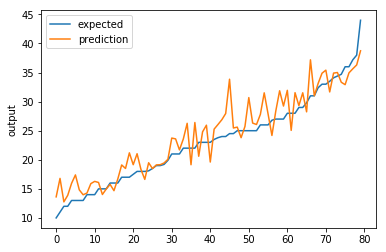

In [0]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

path = "./data/"
preprocess = False

filename_read = os.path.join(path,"auto-mpg.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

# Vetor de features
missing_median(df, 'horsepower')
encode_text_dummy(df, 'origin')
df.drop('name',1,inplace=True)

preprocess = False
if preprocess:
    encode_numeric_zscore(df, 'horsepower')
    encode_numeric_zscore(df, 'weight')
    encode_numeric_zscore(df, 'cylinders')
    encode_numeric_zscore(df, 'displacement')
    encode_numeric_zscore(df, 'acceleration')

# Dados de treino
x,y = to_xy(df,'mpg')

# Split em treino/teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Rede Neural
model = Sequential()
model.add(Dense(10, input_dim = x.shape[1], kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'normal'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
model.fit(x, y, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 0, epochs = 1000)

# Previsões
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

# Plot 
chart_regression(pred.flatten(),y_test)

In [0]:
# sem normalização
Epoch 00090: early stopping
Score (RMSE): 2.742065191268921
    
Epoch 00191: early stopping
Score (RMSE): 2.724492311477661
    
# com normalização
Epoch 00134: early stopping
Score (RMSE): 3.280609130859375
    
Epoch 00157: early stopping
Score (RMSE): 3.239733934402466

## Parâmetros Importantes

* **learning_rate** - Quão rápido o otimizador tentará treinar a rede neural. Muito alto não conseguirá treinar. Muito baixo irá treinar muito devagar.
* **momentum** - Somente usado com o otimizador de momentum. Quanto da direção de mudança de peso anterior deve ser usada na etapa atual.
* **every_n_steps** - How often should the validation set be evaluated.
* **early_stopping_rounds** - Com que frequência o conjunto de validação deve ser avaliado.

Momentum e taxa de aprendizagem contribuem para o sucesso do treinamento, mas na verdade não fazem parte da rede neural. Uma vez que o treinamento está completo, os pesos treinados permanecem e não utilizam momentum ou a taxa de aprendizado. Eles são essencialmente parte do andaime temporário que cria uma rede neural treinada. Escolher o momentum e a taxa de aprendizagem corretos pode afetar a eficácia do seu treinamento. A taxa de aprendizagem afeta a velocidade na qual sua rede neural treina. Diminuir a taxa de aprendizagem torna o treinamento mais meticuloso. As taxas de aprendizagem superiores podem ignorar as configurações de peso ótimas. Uma taxa de treinamento menor sempre produzirá melhores resultados. No entanto, reduzir a taxa de treinamento pode aumentar consideravelmente o tempo de execução. Reduzir a taxa de aprendizagem à medida que a rede treina pode ser uma técnica eficaz. Você pode usar o momentum para combater mínimos locais. Se você encontrar a rede neural estagnada, um maior valor de momentum pode empurrar o treinamento após o mínimo local que encontrou. Em última análise, escolher bons valores para o momentum e taxa de aprendizagem é um processo de tentativa e erro. Você pode variar tanto quanto o treinamento avança. Momentum é geralmente definido como 0.9 e a taxa de aprendizado em 0.1 ou inferior.

## Cálculo do Erro da Rede

O cálculo do erro da rede é a diferença entre o valor previsto gerado pelo algoritmo e o valor observado usado durante o treinamento. A definição do erro da rede, é parte crucial do treinamento com Backpropagation. Existem algumas formas de calcular o erro da rede:

* Função de Erro quadrática (Também conhecida como Mean Square Error)
* Cross Entropy Error Function

No próximo item de aprendizagem você encontra detalhes sobre essas medidas de erro!

## Entropia Cruzada

In [0]:
import numpy as np
pobservado = np.array([0., 1., 0.])
pprevisto = np.array([0.228, 0.619, 0.153])

#h(p,q) = - sum (p(x) log(q(x))
h = - np.sum(pobservado  * np.log(pprevisto))
#np.set_printoptions(suppress=True, precision=3)
print(h)               

0.47965000629754095
